# Import libraries

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

#  Loading data

In [2]:
file_path = 'heart_2020_cleaned.csv'
df = pd.read_csv(file_path)
df[:20]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


Набор данных - данные ежегодного опроса CDC за 2020 год примерно 400000 взрослых связанные с состоянием их здоровья. Первый столбец - наличие сердечных заболеваний, остальные - ключевые индикаторы сердечно-сосудистых заболеваний. Задача является задачей бинарной классификации.

# EDA + feature engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

выводим информацию о датасете, отсутствующих значений нет, 4 столбца с числовыми данными.

In [4]:
#выводим статистику по числовым параметрам
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


<AxesSubplot:>

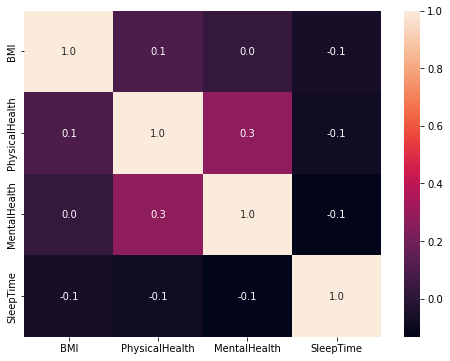

In [5]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(method = 'spearman'), annot = True, fmt = ".1f")

Text(0.5, 1.0, 'Гистограмма целевой переменной HeartDisease')

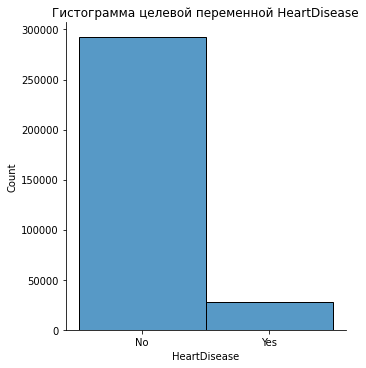

In [6]:
sns.displot(df.HeartDisease, bins = 100, kde = False)
plt.title("Гистограмма целевой переменной HeartDisease")

<AxesSubplot:ylabel='Heart Disease'>

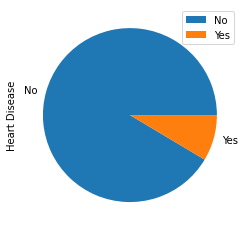

In [16]:
df.groupby('HeartDisease').size().plot(kind='pie',legend=True, label="Heart Disease")

# Preprocessing data

In [7]:
#функция, возвращающая массив столбцов с определенным типом данных
def get_type_cols(frame, type):
  s = (frame.dtypes == type)
  return list(s[s].index)

#получаем столбец категориальных переменных
df_cat_cols = get_type_cols(df, 'object')
print("Categorical variables:")
print(df_cat_cols)

#получаем столбец числовых переменных
df_num_cols = get_type_cols(df, 'float64')
print('Numerical variables:')
print(df_num_cols)

Categorical variables:
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
Numerical variables:
['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


In [8]:
#испоьзуем OrdinalEncoder для изменения значений определяемого столбца
ordinal_encoder = OrdinalEncoder()

df[['HeartDisease']] = ordinal_encoder.fit_transform(df[['HeartDisease']])

In [9]:

X = df.drop(['HeartDisease'], axis = 1)
y = df.HeartDisease

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, 
                                                      test_size = 0.2, random_state = 0)

In [10]:
train_cat_cols = get_type_cols(X_train, 'object')
print("Categorical columns in X_train: ")
print(train_cat_cols)

Categorical columns in X_train: 
['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [11]:
#Используем OneHotEncoder для определяющих переменных
OH_encoder = OneHotEncoder(handle_unknown = 'ignore', 
                           sparse = False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[train_cat_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.fit_transform(X_valid[train_cat_cols]))

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

num_X_train = X_train.drop(train_cat_cols, axis = 1)
num_X_valid = X_valid.drop(train_cat_cols, axis = 1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis = 1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis = 1)

# Modeling

In [12]:
#тренировка модели и получение результатов проверки
def get_preds(model, X_train, X_valid, y_train):
  model.fit(X_train, y_train)
  return model.predict(X_valid)

#оценивание точности модели с помощью нормализованной
#и ненормализованной метрики accuracy
def get_accuracy(preds, y_valid):
  print("ratio: ", accuracy_score(preds, y_valid))
  print("number of correct predictions", accuracy_score(preds, y_valid, normalize = False))

In [13]:
#определение моделей
KNclass = KNeighborsClassifier(n_neighbors = 5)
XGBclass = XGBClassifier(n_estimators = 1000)
RFclass = RandomForestClassifier(n_estimators = 500, random_state = 0)
classifiers = [KNclass, XGBclass, RFclass]

In [14]:
#оцениваем точность каждой модели
for classifier in classifiers:
  print(classifier)
  prediction = get_preds(classifier, OH_X_train, OH_X_valid, y_train)
  get_accuracy(prediction, y_valid)
  print("-"*30, '\n')

KNeighborsClassifier()
ratio:  0.908613330414797
number of correct predictions 58114
------------------------------ 

XGBClassifier(n_estimators=1000)
ratio:  0.9164777435544645
number of correct predictions 58617
------------------------------ 

RandomForestClassifier(n_estimators=500, random_state=0)
ratio:  0.9040791757219468
number of correct predictions 57824
------------------------------ 



Наибольшую точность получил классификатор XGBClassofier